# Try Scipy Integrate for Solution

Have to decompose second order into system of first order.

$$ \ddot{x}+2 \beta \dot{x}+\omega^{2} x+\phi x^{2}+\epsilon x^{3} = 0 $$

Let $y = x'$, then we have a system of two first order equations:

1) $x' = y$ \
2) $y' = -(2 \beta y + \omega^{2} x + \phi x^2 + \epsilon x^3) $

subject to: $x_0 = 0, y_0 = 1$

In [1]:
# from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np

In [2]:
beta = .1
omega = 1.
phi = 1.
epsilon = .1

In [3]:
def nlo_system(t, z, beta, omega, phi, epsilon):
    x, y = z # y = x'
    return np.array([y, -(2 * beta * y + (omega**2) * x + phi * (x**2) + epsilon * (x**3))])

In [4]:
t = np.linspace(0, 8*np.pi, 1000)

In [5]:
sol = odeint(nlo_system, [0, 1], t, args=(beta, omega, phi, epsilon), tfirst=True)

In [6]:
sol

array([[ 0.        ,  1.        ],
       [ 0.02509204,  0.9946604 ],
       [ 0.05004183,  0.98868804],
       ...,
       [ 0.09712807, -0.06297519],
       [ 0.09551423, -0.06531147],
       [ 0.09384238, -0.06758681]])

In [7]:
import matplotlib.pyplot as plt

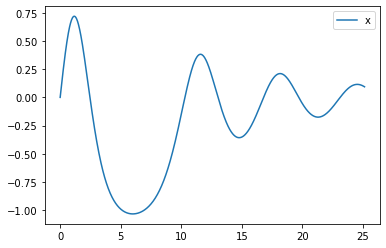

In [8]:
plt.plot(t, sol[:, 0], label='x', alpha=1)
plt.legend()

In [9]:
from denn.problems import NonlinearOscillator

In [10]:
nlo = NonlinearOscillator(t_max=8*np.pi)

In [11]:
y = nlo.get_solution(t)

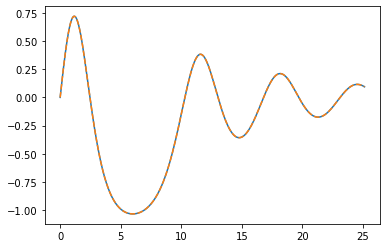

In [14]:
plt.plot(t, sol[:, 0])
plt.plot(t, y, '--')